<a href="https://colab.research.google.com/github/davidmertenjonestccs/practicalpython/blob/main/PracticalPython_WikipediaScraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
#from lxml import etree
import urllib.request
import seaborn as sns

## Wikipedia Tables

Wikipedia articles often contain tabular data. Sometimes, it's helpful to see data in a table to get a quick understanding of it, but in many cases, it's more informative to see it in a graph.

We have an example here of a Wikipedia article that contains a table that *sort of* conveys information, but which would work much better as a visualization:


https://en.wikipedia.org/wiki/College_admissions_in_the_United_States

Let's look specifically at this table:

*Applications, admission and enrollment at 56 schools with admit rate averaging below 22% in Fall 2019–Fall 2022.\[56]*

*Source: Common Data Sets / College announcements and publications*

We can create a quick visualization from the data in this table that shows how applications, admissions, and acceptance change over time within the subgroups of universities included in the survey.



# Requests

Versatile and simple to use, the Python `requests` module is suitable for handling HTTP requests (GET, POST, PUT, DELETE).

Here we use the `.get()`method to retrieve the contents of the website hosted at the supplied URL.

In [ ]:
response = requests.get('https://en.wikipedia.org/wiki/College_admissions_in_the_United_States')

In [ ]:
response

<Response [200]>

# What does 200 mean? Where is the website data?

"200" is the HTML response code that means "It worked!" You have probably encountered a few HTML response codes before - "404" means "not found" and "503" means "service unavailable."

These are shorthand codes designed to communicate different conditions. There are many [HTML response codes](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes), including some silly ones like 418 - "[I'm a teapot](https://en.wikipedia.org/wiki/Hyper_Text_Coffee_Pot_Control_Protocol) (so stop asking me for coffee)."

The website data is included as one of the attributes of `response`, `.content`.

In [ ]:
response.content[0:8000]

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>College admissions in the United States - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limi

# The Easy Way: Pandas DataFrame from `.read_html()`

Pandas is an extensive Python library for handling tabular data. Once we load a table into a pandas DataFrame, we will be able to access its columns individually. Columns in a DataFrame are Series objects, which are a specialized form of Container object.

Pandas has a method called `.read_html()` that generally does a good job parsing data from tables in HTML code. It won't work for *everything* but if you're trying to extract a table from a webpage, it's so fast that it should usually be the first tool you try.

In [ ]:
df = pd.read_html(response.content)

In [ ]:
#This table just contains information about the article itself:

df[0]

,0,1
0,NaN,This article has multiple issues. Please help ...
1,NaN,"This article contains instructions, advice, or..."
2,NaN,This article may contain an excessive amount o...


In [ ]:

df[1]

,0,1
0,NaN,"This article contains instructions, advice, or..."


In [ ]:
df[2]

,0,1
0,NaN,This article may contain an excessive amount o...


In [ ]:
#Here's what we're looking for!

df[3]

Unnamed: 0_level_0 Total (56 institutions)                     \
   Unnamed: 0_level_1      Unnamed: 1_level_1 Unnamed: 2_level_1   
    Admit Year (Fall)                    Apps             Admits   
0                2001                  645111             198815   
1                2002                  650908             202565   
2                2003                  681989             206423   
3                2004                  699074             207238   
4                2005                  737493             213865   
5                2006                  773374             217846   
6                2007                  822156             220200   
7                2008                  900502             225242   
8                2009                  945442             237141   
9                2010                 1005061             241971   
10               2011                 1081719             242188   
11               2012                 1122097             239371   
12               2013                 1197549             237696   
13               2014                 1279412             242628   
14               2015                 1325730             240687   
15               2016                 1390056             242910   
16               2017                 1451021             238317   
17               2018                 1588286             225082   
18               2019                 1635975             213999   
19               2020                 1602944             235872   
20               2021                 1992872             226931   
21               2022                 2092503             203618   

                                                             \
   Unnamed: 3_level_1 Unnamed: 4_level_1 Unnamed: 5_level_1   
               Enroll        Admit  rate      Admit: enroll   
0               79872              30.8%               2.49   
1               82026              31.1%               2.47   
2               82544              30.3%               2.50   
3               83682              29.6%               2.48   
4               83591              29.0%               2.56   
5               83900              28.2%               2.60   
6               85740              26.8%               2.57   
7               85678              25.0%               2.63   
8               87201              25.1%               2.72   
9               88208              24.1%               2.74   
10              88691              22.4%               2.73   
11              89921              21.3%               2.66   
12              89586              19.8%               2.65   
13              92713              19.0%               2.62   
14              92548              18.2%               2.60   
15              95213              17.5%               2.55   
16              96667              16.4%               2.47   
17              96815              14.2%               2.32   
18              95601              13.1%               2.24   
19              95900              14.7%               2.46   
20             105549              11.4%               2.15   
21              99721               9.7%               2.04   

                                                                                                                                                                      27 private universities  \
   Ivy League, Stanford, MIT, UChicago, Duke, Northwestern, Vanderbilt, Johns Hopkins, Rice, USC, WashU, Tulane, Tufts, Georgetown, Carnegie Mellon, Notre Dame, Emory, NYU, BU, Northeastern   
                                                                                                                                                                                         Apps   
0                                              415855                                                                                              

As you can see at the top of this DataFrame, the data is multi-indexed. We would like to simplify the table so there is only one index of column names. We can use string methods to combine names of the fields in the multi-index so they are still unique:


In [ ]:
type(df[3].columns)

pandas.core.indexes.multi.MultiIndex

In [ ]:
df[3].columns

MultiIndex([(      'Unnamed: 0_level_0', ...),
            ( 'Total (56 institutions)', ...),
            ( 'Total (56 institutions)', ...),
            ( 'Total (56 institutions)', ...),
            ( 'Total (56 institutions)', ...),
            ( 'Total (56 institutions)', ...),
            ( '27 private universities', ...),
            ( '27 private universities', ...),
            ( '27 private universities', ...),
            ( '27 private universities', ...),
            ( '27 private universities', ...),
            (   '6 public universities', ...),
            (   '6 public universities', ...),
            (   '6 public universities', ...),
            (   '6 public universities', ...),
            (   '6 public universities', ...),
            ('23 liberal arts colleges', ...),
            ('23 liberal arts colleges', ...),
            ('23 liberal arts colleges', ...),
            ('23 liberal arts colleges', ...),
            ('23 liberal arts colleges', ...)],
           )

The ".to_flat_index()" method converts the multiindex to a list of indices for each column


In [ ]:

df[3].columns = df[3].columns.to_flat_index()


In [ ]:

df[3].columns[0:5]

Index([('Unnamed: 0_level_0', 'Unnamed: 0_level_1', 'Admit Year (Fall)'),
               ('Total (56 institutions)', 'Unnamed: 1_level_1', 'Apps'),
             ('Total (56 institutions)', 'Unnamed: 2_level_1', 'Admits'),
             ('Total (56 institutions)', 'Unnamed: 3_level_1', 'Enroll'),
        ('Total (56 institutions)', 'Unnamed: 4_level_1', 'Admit  rate')],
      dtype='object')

In [ ]:
# Use a "|" to join the first index with the last for each column:
# Make sure you don't run this cell more than once.
df[3].columns = [column[0]+'|'+column[-1] for column in df[3].columns]

In [ ]:

df[3].columns

Index(['Unnamed: 0_level_0|Admit Year (Fall)', 'Total (56 institutions)|Apps',
       'Total (56 institutions)|Admits', 'Total (56 institutions)|Enroll',
       'Total (56 institutions)|Admit  rate',
       'Total (56 institutions)|Admit: enroll', '27 private universities|Apps',
       '27 private universities|Admits', '27 private universities|Enroll',
       '27 private universities|Admit  rate',
       '27 private universities|Admit: enroll', '6 public universities|Apps',
       '6 public universities|Admits', '6 public universities|Enroll',
       '6 public universities|Admit  rate',
       '6 public universities|Admit: enroll', '23 liberal arts colleges|Apps',
       '23 liberal arts colleges|Admits', '23 liberal arts colleges|Enroll',
       '23 liberal arts colleges|Admit  rate',
       '23 liberal arts colleges|Admit: enroll'],
      dtype='object')

In [ ]:

df[3].columns

Index(['Unnamed: 0_level_0|Admit Year (Fall)', 'Total (56 institutions)|Apps',
       'Total (56 institutions)|Admits', 'Total (56 institutions)|Enroll',
       'Total (56 institutions)|Admit  rate',
       'Total (56 institutions)|Admit: enroll', '27 private universities|Apps',
       '27 private universities|Admits', '27 private universities|Enroll',
       '27 private universities|Admit  rate',
       '27 private universities|Admit: enroll', '6 public universities|Apps',
       '6 public universities|Admits', '6 public universities|Enroll',
       '6 public universities|Admit  rate',
       '6 public universities|Admit: enroll', '23 liberal arts colleges|Apps',
       '23 liberal arts colleges|Admits', '23 liberal arts colleges|Enroll',
       '23 liberal arts colleges|Admit  rate',
       '23 liberal arts colleges|Admit: enroll'],
      dtype='object')

In [ ]:
schools = {
    'Total (56 institutions)':'Total',
    '27 private universities':'Private',
    '6 public universities':'Public',
    '23 liberal arts colleges':'Liberal Arts'
    }
for school in schools.keys():
    df[3].columns = [column.replace(school, schools[school]) for column in df[3].columns]

In [ ]:
df[3]

,Unnamed: 0_level_0|Admit Year (Fall),Total|Apps,Total|Admits,Total|Enroll,Total|Admit rate,Total|Admit: enroll,Private|Apps,Private|Admits,Private|Enroll,Private|Admit rate,...,Public|Apps,Public|Admits,Public|Enroll,Public|Admit rate,Public|Admit: enroll,Liberal Arts|Apps,Liberal Arts|Admits,Liberal Arts|Enroll,Liberal Arts|Admit rate,Liberal Arts|Admit: enroll
0,2001,645111,198815,79872,30.8%,2.49,415855,120124,46931,28.9%,...,138627,49041,22110,35.4%,2.22,90629,29650,10831,32.7%,2.74
1,2002,650908,202565,82026,31.1%,2.47,418230,123779,48626,29.6%,...,141166,49377,22264,35.0%,2.22,91512,29409,11136,32.1%,2.64
2,2003,681989,206423,82544,30.3%,2.50,439502,126504,49491,28.8%,...,146165,50209,22262,34.4%,2.26,96322,29710,10791,30.8%,2.75
3,2004,699074,207238,83682,29.6%,2.48,453319,126441,49615,27.9%,...,144258,50923,23169,35.3%,2.20,101497,29874,10898,29.4%,2.74
4,2005,737493,213865,83591,29.0%,2.56,484023,132750,49982,27.4%,...,147507,51430,22639,34.9%,2.27,105963,29685,10970,28.0%,2.71
5,2006,773374,217846,83900,28.2%,2.60,516292,135568,49507,26.3%,...,148794,52343,23589,35.2%,2.22,108288,29935,10804,27.6%,2.77
6,2007,822156,220200,85740,26.8%,2.57,543558,135918,50250,25.0%,...,163374,54788,24637,33.5%,2.22,115224,29494,10853,25.6%,2.72
7,2008,900502,225242,85678,25.0%,2.63,600623,140741,50180,23.4%,...,172826,54634,24347,31.6%,2.24,127053,29867,11151,23.5%,2.68
8,2009,945442,237141,87201,25.1%,2.72,636650,148566,51285,23.3%,...,186771,58364,24830,31.2%,2.35,122021,30211,11086,24.8%,2.73
9,2010,1005061,241971,88208,24.1%,2.74,686095,151404,51658,22.1%,...,192770,59986,25175,31.1%,2.38,126196,30581,11375,24.2%,2.69


In [ ]:

df[3].columns

Index(['Unnamed: 0_level_0|Admit Year (Fall)', 'Total|Apps', 'Total|Admits',
       'Total|Enroll', 'Total|Admit  rate', 'Total|Admit: enroll',
       'Private|Apps', 'Private|Admits', 'Private|Enroll',
       'Private|Admit  rate', 'Private|Admit: enroll', 'Public|Apps',
       'Public|Admits', 'Public|Enroll', 'Public|Admit  rate',
       'Public|Admit: enroll', 'Liberal Arts|Apps', 'Liberal Arts|Admits',
       'Liberal Arts|Enroll', 'Liberal Arts|Admit  rate',
       'Liberal Arts|Admit: enroll'],
      dtype='object')

# The Hard Way: BeautifulSoup

What if pandas's `read_html()` doesn't work, or if the data you're trying to scrape isn't in a table?

There's another tool you can use to parse HTML: BeautifulSoup (so-called because that mess of HTML tags is sometimes called "tag soup", and as a reference to a Lewis Carroll poem in *Alice's Adventures in in Wonderland* of the same name)

BeautifulSoup can parse HTML and XML files, allowing the user to quickly locate different tags and give structure to chaos. It's not as fast as `read_html()` but it does offer a lot of flexibility and control for the user.

In [ ]:
# "soup" is our variable to store the content we pulled using requests
soup = BeautifulSoup(response.content)

In [ ]:
dir(soup)

['ASCII_SPACES',
 'DEFAULT_BUILDER_FEATURES',
 'DEFAULT_INTERESTING_STRING_TYPES',
 'EMPTY_ELEMENT_EVENT',
 'END_ELEMENT_EVENT',
 'NO_PARSER_SPECIFIED_WARNING',
 'ROOT_TAG_NAME',
 'START_ELEMENT_EVENT',
 'STRING_ELEMENT_EVENT',
 '__bool__',
 '__call__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_all_strings',
 '_clone',
 '_decode_markup',
 '_event_stream',
 '_feed',
 '_find_all',
 '_find_one',
 '_format_tag',
 '_indent_string',
 '_is_xml',
 '_lastRecursiveChild',
 '_last_descenda

In [ ]:
soup.get_text()

'\n\n\nCollege admissions in the United States - Wikipedia\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nJump to content\n\n\n\n\n\n\n\nMain menu\n\n\n\n\n\nMain menu\nmove to sidebar\nhide\n\n\n\n\t\tNavigation\n\t\n\n\nMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate\n\n\n\n\n\n\t\tContribute\n\t\n\n\nHelpLearn to editCommunity portalRecent changesUpload file\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSearch\n\n\n\n\n\n\n\n\n\n\n\nSearch\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nAppearance\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCreate account\n\nLog in\n\n\n\n\n\n\n\n\nPersonal tools\n\n\n\n\n\n Create account Log in\n\n\n\n\n\n\t\tPages for logged out editors learn more\n\n\n\nContributionsTalk\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nContents\nmove to sidebar\nhide\n\n\n\n\n(Top)\n\n\n\n\n\n1\nParticipants\n\n\n\n\nToggle Participants subsection\n\n\n\n\n\n1.1\nStudents\n\n\n\n\n\n\n\n\n1.2\nParents\n\n\n\n\n\n\n\n\n1.

In [ ]:
tables = soup.find_all('table')
len(tables)

10

In [ ]:
tables[3]

<table class="wikitable">
<caption>Applications, admission and enrollment at 56 schools with admit rate averaging below 22% in Fall 2019–Fall 2022.<sup class="reference" id="cite_ref-:3_56-0"><a href="#cite_note-:3-56"><span class="cite-bracket">[</span>56<span class="cite-bracket">]</span></a></sup><br/>Source: Common Data Sets / College announcements and publications
</caption>
<tbody><tr>
<th>
</th>
<th colspan="5">Total (56 institutions)
</th>
<th colspan="5">27 private universities
</th>
<th colspan="5">6 public universities
</th>
<th colspan="5">23 liberal arts colleges
</th></tr>
<tr>
<th>
</th>
<th colspan="5">
</th>
<th colspan="5"><small><a href="/wiki/Ivy_League" title="Ivy League">Ivy League</a>, <a href="/wiki/Stanford_University" title="Stanford University">Stanford</a>, <a href="/wiki/Massachusetts_Institute_of_Technology" title="Massachusetts Institute of Technology">MIT</a>, <a href="/wiki/University_of_Chicago" title="University of Chicago">UChicago</a>, <a href="/wik

In [ ]:
headers = []
for table in tables[3].find_all('th'):
  headers.append(table.text)

headers

['\n',
 'Total (56 institutions)\n',
 '27 private universities\n',
 '6 public universities\n',
 '23 liberal arts colleges\n',
 '\n',
 '\n',
 'Ivy League, Stanford, MIT, UChicago, Duke, Northwestern, Vanderbilt, Johns Hopkins, Rice, USC, WashU, Tulane, Tufts, Georgetown, Carnegie Mellon, Notre Dame, Emory, NYU, BU, Northeastern\n',
 'UCLA, UC Berkeley, Georgia Tech,\nUNC-Chapel Hill, UMich, UVA\n\n',
 'Pomona, Claremont McK, Swarthmore, Bowdoin, Amherst, Williams, Colby, Barnard, Pitzer, Bates, Harvey Mudd, Colorado Coll, Middlebury, Wesleyan, Hamilton, Haverford, Carleton, Davidson, Wellesley, W&L, Colgate, Grinnell, Vassar\n',
 'Admit Year (Fall)\n',
 'Apps\n',
 'Admits\n',
 'Enroll\n',
 'Admit rate\n',
 'Admit:enroll\n',
 'Apps\n',
 'Admits\n',
 'Enroll\n',
 'Admit rate\n',
 'Admit:enroll\n',
 'Apps\n',
 'Admits\n',
 'Enroll\n',
 'Admit rate\n',
 'Admit:enroll\n',
 'Apps\n',
 'Admits\n',
 'Enroll\n',
 'Admit rate\n',
 'Admit:enroll\n']

In [ ]:
headers = headers[10:]

headers = [header.replace('\n', '') for header in headers]
headers[1:6] = ["Total|"+header for header in headers[1:6]]
headers[6:11] = ["Private|"+header for header in headers[6:11]]
headers[11:16] = ["Public|"+header for header in headers[11:16]]
headers[16:21] = ["Liberal Arts|"+header for header in headers[16:21]]


In [ ]:

headers

['Admit Year (Fall)',
 'Total|Apps',
 'Total|Admits',
 'Total|Enroll',
 'Total|Admit rate',
 'Total|Admit:enroll',
 'Private|Apps',
 'Private|Admits',
 'Private|Enroll',
 'Private|Admit rate',
 'Private|Admit:enroll',
 'Public|Apps',
 'Public|Admits',
 'Public|Enroll',
 'Public|Admit rate',
 'Public|Admit:enroll',
 'Liberal Arts|Apps',
 'Liberal Arts|Admits',
 'Liberal Arts|Enroll',
 'Liberal Arts|Admit rate',
 'Liberal Arts|Admit:enroll']

In [ ]:

headers = {header:[] for header in headers}

In [ ]:
# Each row of the table contains an entry for every header.
for row in tables[3].find_all('tr'):

  #Parse rows into lists
  row_list = [td for td in row.find_all('td')]

  #If a row has the same length as headers, it's part of the table that contains
  # data
  if len(row_list) == len(headers):

    # Change rows to columns by iteratively adding each row element to a list
    # that will become a column.
    for item, header in zip(row_list, headers.keys()):

      #Append each item to a list in the headers dictionary
      #Delte "newline" characters and commas
      headers[header].append(item.text.replace('\n','').replace(',',''))

In [ ]:
# The numbers from the table are stored as strings:
headers['Total|Admits']

['198815',
 '202565',
 '206423',
 '207238',
 '213865',
 '217846',
 '220200',
 '225242',
 '237141',
 '241971',
 '242188',
 '239371',
 '237696',
 '242628',
 '240687',
 '242910',
 '238317',
 '225082',
 '213999',
 '235872',
 '226931',
 '203618']

In [ ]:
soup_df = pd.DataFrame(headers)

In [ ]:
for column in soup_df.columns:

  # Turn strings of numbers into integers if possible
  try:
    soup_df[column] = soup_df[column].apply(lambda x: int(x))

  # Do not convert strings that contain "%"
  except ValueError:
    pass



In [ ]:
soup_df

,Admit Year (Fall),Total|Apps,Total|Admits,Total|Enroll,Total|Admit rate,Total|Admit:enroll,Private|Apps,Private|Admits,Private|Enroll,Private|Admit rate,...,Public|Apps,Public|Admits,Public|Enroll,Public|Admit rate,Public|Admit:enroll,Liberal Arts|Apps,Liberal Arts|Admits,Liberal Arts|Enroll,Liberal Arts|Admit rate,Liberal Arts|Admit:enroll
0,2001,645111,198815,79872,30.8%,2.49,415855,120124,46931,28.9%,...,138627,49041,22110,35.4%,2.22,90629,29650,10831,32.7%,2.74
1,2002,650908,202565,82026,31.1%,2.47,418230,123779,48626,29.6%,...,141166,49377,22264,35.0%,2.22,91512,29409,11136,32.1%,2.64
2,2003,681989,206423,82544,30.3%,2.50,439502,126504,49491,28.8%,...,146165,50209,22262,34.4%,2.26,96322,29710,10791,30.8%,2.75
3,2004,699074,207238,83682,29.6%,2.48,453319,126441,49615,27.9%,...,144258,50923,23169,35.3%,2.20,101497,29874,10898,29.4%,2.74
4,2005,737493,213865,83591,29.0%,2.56,484023,132750,49982,27.4%,...,147507,51430,22639,34.9%,2.27,105963,29685,10970,28.0%,2.71
5,2006,773374,217846,83900,28.2%,2.60,516292,135568,49507,26.3%,...,148794,52343,23589,35.2%,2.22,108288,29935,10804,27.6%,2.77
6,2007,822156,220200,85740,26.8%,2.57,543558,135918,50250,25.0%,...,163374,54788,24637,33.5%,2.22,115224,29494,10853,25.6%,2.72
7,2008,900502,225242,85678,25.0%,2.63,600623,140741,50180,23.4%,...,172826,54634,24347,31.6%,2.24,127053,29867,11151,23.5%,2.68
8,2009,945442,237141,87201,25.1%,2.72,636650,148566,51285,23.3%,...,186771,58364,24830,31.2%,2.35,122021,30211,11086,24.8%,2.73
9,2010,1005061,241971,88208,24.1%,2.74,686095,151404,51658,22.1%,...,192770,59986,25175,31.1%,2.38,126196,30581,11375,24.2%,2.69


In [ ]:
soup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Admit Year (Fall)          22 non-null     int64 
 1   Total|Apps                 22 non-null     int64 
 2   Total|Admits               22 non-null     int64 
 3   Total|Enroll               22 non-null     int64 
 4   Total|Admit rate           22 non-null     object
 5   Total|Admit:enroll         22 non-null     object
 6   Private|Apps               22 non-null     int64 
 7   Private|Admits             22 non-null     int64 
 8   Private|Enroll             22 non-null     int64 
 9   Private|Admit rate         22 non-null     object
 10  Private|Admit:enroll       22 non-null     object
 11  Public|Apps                22 non-null     int64 
 12  Public|Admits              22 non-null     int64 
 13  Public|Enroll              22 non-null     int64 
 14  Public|Admit

# Visualizations


## Total (56)

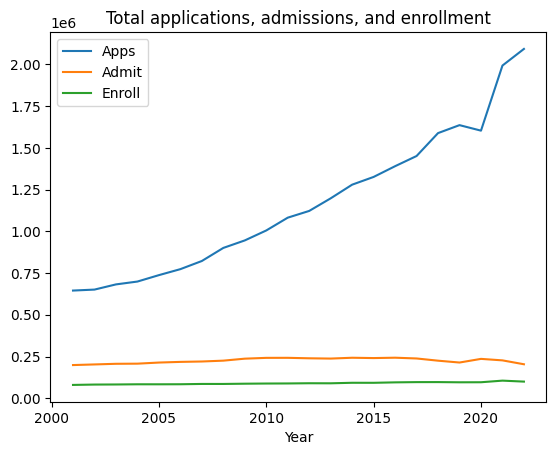

In [ ]:
fig, ax = plt.subplots()

ax.plot(
    df[3]['Unnamed: 0_level_0|Admit Year (Fall)'],
    df[3]['Total|Apps'], label='Apps'
    )

ax.plot(
    df[3]['Unnamed: 0_level_0|Admit Year (Fall)'],
    df[3]['Total|Admits'], label='Admits'
    )

ax.plot(
    df[3]['Unnamed: 0_level_0|Admit Year (Fall)'],
    df[3]['Total|Enroll'], label='Enroll'
    )

title ='Total applications, admissions, and enrollment'
plt.title(title)
plt.xlabel('Year')

ax.legend()
plt.show()

## Private, Public, and Liberal Arts Colleges (27)


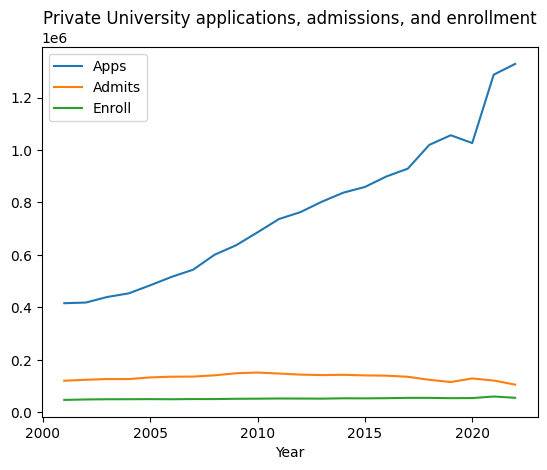

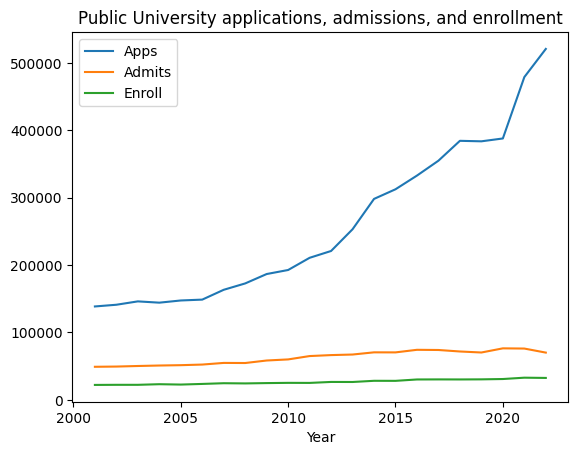

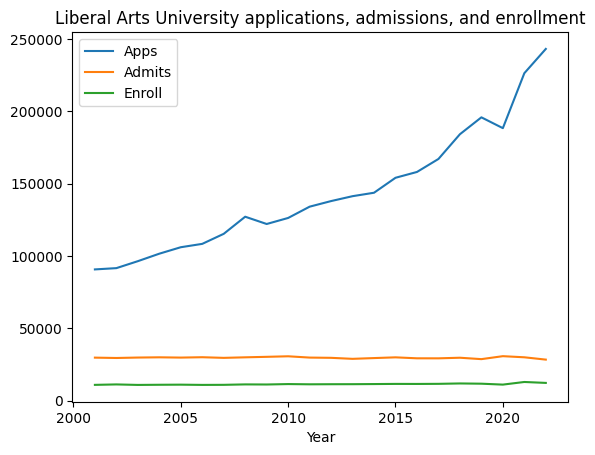

In [ ]:
for campus_type in ['Private', 'Public', 'Liberal Arts']:

  fig, ax = plt.subplots()

  for stat in ['Apps', 'Admits', 'Enroll']:

    ax.plot(
      df[3]['Unnamed: 0_level_0|Admit Year (Fall)'],
      df[3]['{}|{}'.format(campus_type, stat)], label=stat
      )


  title = '{} University applications, admissions, and enrollment'.format(
    campus_type
    )

  plt.title(title)
  plt.xlabel('Year')

  ax.legend()
  plt.show()
  print('\n')

## Your Turn!

Find the table showing historical population on the Wikipedia page for Claremont, California, and turn it into a line plot as we did for University admissions.

In [ ]:
response2 = requests.get('https://en.wikipedia.org/wiki/Claremont,_California')
soup2 = BeautifulSoup(response2.content)

In [ ]:
soup2 = BeautifulSoup(response2.content)

In [ ]:
tables2 = soup2.find_all('table')
len(tables2)

10

In [ ]:
df2 = pd.read_html(response2.content)

In [ ]:
df2[2]

,Census,Pop.,Note,%±
0,1930,2719,NaN,—
1,1940,3057,NaN,12.4%
2,1950,6327,NaN,107.0%
3,1960,12633,NaN,99.7%
4,1970,24776,NaN,96.1%
5,1980,31028,NaN,25.2%
6,1990,32503,NaN,4.8%
7,2000,33998,NaN,4.6%
8,2010,34926,NaN,2.7%
9,2020,37266,NaN,6.7%


In [ ]:

df2[2].drop(index=10,inplace=True)

In [ ]:
df2[2]

,Census,Pop.,Note,%±
0,1930,2719,NaN,—
1,1940,3057,NaN,12.4%
2,1950,6327,NaN,107.0%
3,1960,12633,NaN,99.7%
4,1970,24776,NaN,96.1%
5,1980,31028,NaN,25.2%
6,1990,32503,NaN,4.8%
7,2000,33998,NaN,4.6%
8,2010,34926,NaN,2.7%
9,2020,37266,NaN,6.7%


In [ ]:

df2[2]['Census'] = df2[2]['Census'].apply(lambda x: int(x))
df2[2]['Pop.'] = df2[2]['Pop.'].apply(lambda x: int(x))

In [ ]:
df2[2]


,Census,Pop.,Note,%±
0,1930,2719,NaN,—
1,1940,3057,NaN,12.4%
2,1950,6327,NaN,107.0%
3,1960,12633,NaN,99.7%
4,1970,24776,NaN,96.1%
5,1980,31028,NaN,25.2%
6,1990,32503,NaN,4.8%
7,2000,33998,NaN,4.6%
8,2010,34926,NaN,2.7%
9,2020,37266,NaN,6.7%


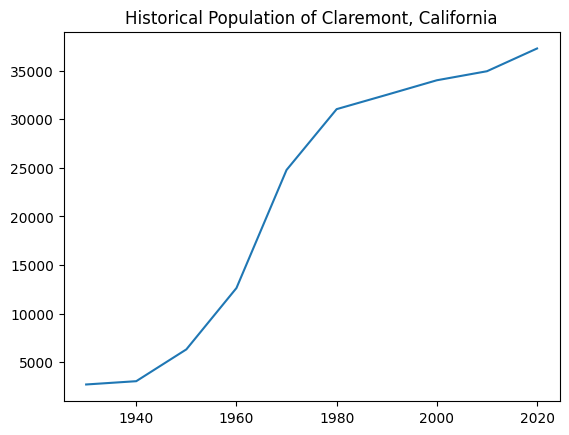

In [ ]:
fig, ax = plt.subplots()
ax.plot(
    df2[2]['Census'],
    df2[2]['Pop.'], label=df2[2]['Census']
    )
plt.title('Historical Population of Claremont, California')
plt.show()

## Sometimes It *DOES* Hurt to Ask

You may have heard the term "[DOS (Denial-of-service) attack](https://en.wikipedia.org/wiki/Denial-of-service_attack)". This occurs when a website is flooded with so many HTTP requests to the point that it can no longer maintain operable status.

Even if you don't *intend* to perform a DOS attack, you may accidentally write code that generates too many request in a short span of time.

Most websites safeguard against DOS attacks by limiting how many requests may be made from a specific IP address within a given time period. If you send too many requests to a given site, your access to it your current IP address may be suspended or revoked. Also, most websites do not make this information public.

Larger-scale websites like wikipedia.org are less likely to shut down your requests, since they already expect a high volume of traffic.

For smaller sites, one can avoid sending too many requests all at once by spacing them out with the `sleep()` function in Python's `time` module.

In [ ]:
from time import sleep

for x in range(0,5):
  print(x)
  sleep(5)

0
1
2
3
4


# Related Topics

Not all data is as easy to scrape (or parse) as Wikipedia aricles. Many webpages have data in other formats, or that comes from other sources.


We won't have time to cover all of these in depth, but we can provide a brief introduction to a few of them so you'll know what to look out for.

# Non-Table Data

Often, data on websites *looks* like it's in a table, but it might be stored using tags other than the "table", "td", "tr", etc. that are used for official "table" objects in HTML. Without explicit "table" tags, the pandas `.read_html()` parser won't work.

In these cases, it is necessary to inspect the webpage and find out what tags are actually being used to store the data.


In [ ]:
result3 = requests.get('https://www.pomona.edu/administration/dining/menus/frary')

In [ ]:
result3

<Response [200]>

In [ ]:
# This cell will produce a ValueError. Don't be alarmed! It's supposed to.

df_frary = pd.read_html(result3.content)

ValueError: No tables found

In [ ]:
soup3 = BeautifulSoup(result3.content)

# Non-HTML Data

Pomona College's Frary Dining Hall's menu is actually stored in a file that is hosted in a separate location, which is used to populate the student-facing webpage.

This file is in a format called JSON (JavaScript Object Notation). JSON is similar to HTML in some ways, insofar as it stores data in flexibly-defined fields, but the syntax is very different.

Inspecting a page and looking in the HTML code can reveal much about how websites are constructed. After some poking around, I was able to locate the source of the menu items:

In [ ]:
menu = soup3.find('div', id='dining-menu-from-json')

In [ ]:
# Clicking the link in this HTML tag will take you to the source file:

menu

<div data-dining-menu-json-url="https://my.pomona.edu/eatec/Frary.json" id="dining-menu-from-json"></div>

# Inline Frames (iframes)

You may be trying to locate a particular element on the page while inspecting, and find that instead of an element like "div" or "h3", the tag shows "iframe".

Much the same as with external JSON or XML files, you may also encounter sites that embed and display HTML from other webpages. In order to isolate elements of the IFrame, you will have to get the URL for the Frame site, and use requests (or another Python module) to get that page's source directly.

IFrames are not as common in modern web development as they once were, but they still show up from time to time.

# Text Data - Constellate

We've so far only covered tabular data, which is a form of what is commonly called "structured data". You may find yourself working on a project for which the data source is written language, which is almost always considered "unstructured data" for purposes of analysis. If this is the case, you may have to employ other tools for gathering and processing it.

If you want to find out more about mining text data, the Library will be hosting a workshop on Tuesday, October 8th, 2024, that provides an introduction to Constellate, Ithaka/JSTOR's online platform for text data analysis and natural language processing.

Constellate also provides robust support for beginning and intermediate Python topics, some of which have not been covered in this workshop series.

We hope to see you there!

https://claremont.libcal.com/event/12812300

*© 2024. This work is openly licensed via [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/)*